In [2]:
import os

path = 'data/MnM-2/validation'
patients = os.listdir(path)
len(patients)

40

In [8]:
dest = 'preds'
#!rm -rf {dest}
os.makedirs(dest)

In [16]:
import nibabel as nib
from tqdm import tqdm

files = ['LA_ED', 'LA_ES', 'SA_ED', 'SA_ES']
for patient in tqdm(patients):
    os.makedirs(f'{dest}/{patient}', exist_ok=True)
    for f in files:
        image_path = f'{path}/{patient}/{patient}_{f}.nii.gz'
        img = nib.load(image_path)
        mask = np.zeros(img.shape)
        mask = nib.Nifti1Image(mask, img.affine)
        nib.save(mask, f'{dest}/{patient}/{patient}_{f}_pred.nii.gz')  

100%|██████████| 40/40 [00:02<00:00, 16.86it/s]


/home/sensio/miniconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/sensio/miniconda3/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/sensio/miniconda3/lib/python3.8/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/sensio/miniconda3/lib/python3.8/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


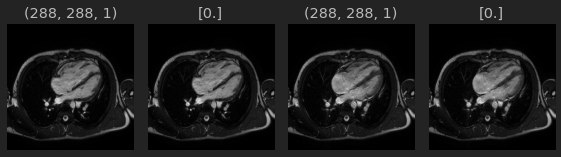

In [20]:
import matplotlib.pyplot as plt
import random

ix = random.randint(0, len(patients))
sample = patients[ix]
fig = plt.figure()
ax = plt.subplot(1, 4, 1)
image_path = f'{path}/{sample}/{sample}_LA_ED.nii.gz'
img = nib.load(image_path).get_fdata()
ax.imshow(img,cmap='gray')
ax.axis('off')
ax.set_title(img.shape)
ax = plt.subplot(1, 4, 2)
image_path = f'{dest}/{sample}/{sample}_LA_ED_pred.nii.gz'
mask = nib.load(image_path).get_fdata()
ax.imshow(img, cmap='gray')
ax.set_title(np.unique(mask))
mask[mask == 0] = np.nan
ax.imshow(mask, alpha=0.5)
ax.axis('off')
ax = plt.subplot(1, 4, 3)
image_path = f'{path}/{sample}/{sample}_LA_ES.nii.gz'
img = nib.load(image_path).get_fdata()
ax.imshow(img,cmap='gray')
ax.axis('off')
ax.set_title(img.shape)
ax = plt.subplot(1, 4, 4)
image_path = f'{dest}/{sample}/{sample}_LA_ES_pred.nii.gz'
mask = nib.load(image_path).get_fdata()
ax.imshow(img, cmap='gray')
ax.set_title(np.unique(mask))
mask[mask == 0] = np.nan
ax.imshow(mask, alpha=0.5)
ax.axis('off')
plt.tight_layout()
plt.show()